# EduWorth Introduction

Many high schoolers must decide on whether to continue their education after their graduation or not. There are many different paths and oppurtunities that come afterward, but the most encouraged path is to continue education in a college or a university. The problem with this path is that it is very expensive choice and will take many years to obtain the degree. 

Questions<br>
Is college the most financially responsible post-secondary education option?<br>
Does the major of the degree and industry matter when going into college?

## Data Sources

<a href="https://nces.ed.gov/datalab/index.aspx">National Center for Education Statistics</a> allows us to select variables for the data that they collected from <a href="https://www.data.gov/education/">data.gov</a> and place them onto a table for us to visualize.

<a href="https://collegescorecard.ed.gov/data/">College Scorecard</a><br>
We used this dataset for finding out additional information regarding the performance of students in classes.<br>

<a href="https://research.collegeboard.org/trends/student-aid">Trends in Student Aid 2019</a><br>This dataset gave us information on what kind of loans that students took out in 2019 and how much money they usually would takeout.

## Data Cleaning

In the College Scorecard Dataset, there were about 1000 columns of different data types and acronyms. Some of these columns were so specific that we disregarded the information that the column recorded.

## Exploratory Data Analysis

explain what your data looks like (words are fine, but visualizations are often better). Include any interesting issues or preliminary conclusions you have about your data. 
Most of our data comes in as very large csv files or in excel workbooks. A majority of those values are null because the column they represent does not apply 

## Visualization

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

Here we will look at the most recent college data brought to us by https://collegescorecard.ed.gov/data/

In [3]:
college_data = pd.read_csv('CollegeScorecard_Raw_Data/MERGED2017_18_PP.csv', low_memory = False) # Opens our data into a dataframe

In [4]:
college_data['GRAD_DEBT_MDN10YR_SUPP'] = college_data['GRAD_DEBT_MDN10YR_SUPP'].replace(to_replace = 'PrivacySuppressed', value = np.nan) # Replace privacy suppressed with nan
college_data = college_data.dropna(subset=['GRAD_DEBT_MDN10YR_SUPP', 'ACTCMMID', 'C100_4_POOLED']) # Get rid of nan values if either in graduate debt median for 10 years, or cumulative act score
print("Mean median ACT Score: ", college_data['ACTCMMID'].mean())
print("Max median ACT Score: ", college_data['ACTCMMID'].max())
print("Min median ACT Score: ", college_data['ACTCMMID'].min())
college_data['GRAD_DEBT_MDN10YR_SUPP']  = college_data["GRAD_DEBT_MDN10YR_SUPP"].astype(float)
college_data['GRAD_DEBT_MDN10YR_SUPP']  = college_data["GRAD_DEBT_MDN10YR_SUPP"].round(0)
# college_data['GRAD_DEBT_MDN10YR_SUPP'] = pd.to_numeric(college_data['GRAD_DEBT_MDN10YR_SUPP'], downcast='int')
college_data['GRAD_DEBT_MDN10YR_SUPP'].unique()
# college_data[['INSTNM','GRAD_DEBT_MDN10YR_SUPP', 'ACTCMMID']].head()

Mean median ACT Score:  23.525931928687196
Max median ACT Score:  35.0
Min median ACT Score:  6.0


array([358., 234., 229., 339., 241., 259., 218., 270., 249., 278., 244.,
       277., 280., 322., 200., 275., 201., 211., 236., 233., 223., 254.,
       210., 208., 227., 214., 202., 197., 258.,  90., 160., 185., 175.,
       156., 139., 150., 162., 143., 135., 165., 174., 159., 221., 231.,
       239., 148., 238., 285., 217., 213., 296., 237., 104., 247., 220.,
       163., 212., 144., 195., 183., 187., 304., 228., 219., 267., 279.,
       253., 242., 176., 295., 274., 184., 125., 235., 207., 169., 182.,
       171., 252., 268., 191., 161., 294., 272., 260., 389., 246., 186.,
       130., 265., 361., 256., 271., 262., 168., 203., 240., 131., 250.,
       324., 245., 181., 152., 261., 377., 251., 192., 276., 232., 225.,
       205., 206., 157., 114., 189., 269., 226., 204., 224., 167.,  58.,
       307., 177., 309., 257., 255., 342., 248., 293., 321., 215., 291.,
       317., 134., 196., 110., 132., 298., 330., 172., 263., 230., 264.,
       173., 362., 273., 155., 243., 305., 102., 16

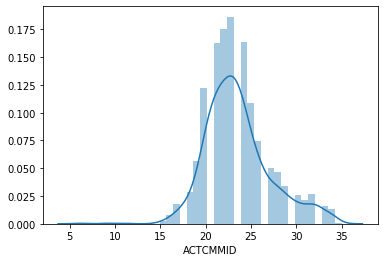

In [5]:
# ACT Score
sns.distplot(college_data['ACTCMMID'])

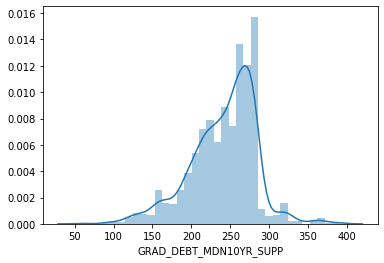

In [6]:
sns.distplot(college_data['GRAD_DEBT_MDN10YR_SUPP'])

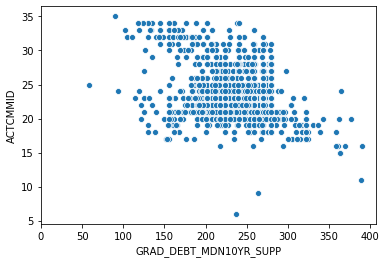

In [7]:
sns.scatterplot(x="GRAD_DEBT_MDN10YR_SUPP", y="ACTCMMID", data=college_data)
plt.xticks(np.arange(0, college_data['GRAD_DEBT_MDN10YR_SUPP'].max()+50, 50.0))
plt.show()

In [8]:
field_data = pd.read_csv('CollegeScorecard_Raw_Data/FieldOfStudyData1516_1617_PP.csv', low_memory = False)

In [9]:
field_data = field_data[['INSTNM', 'MD_EARN_WNE']]
result = field_data[field_data.MD_EARN_WNE != 'PrivacySuppressed']
result['MD_EARN_WNE'] = result['MD_EARN_WNE'].astype(int)
final = result.groupby('INSTNM').mean().astype(int).sort_values('MD_EARN_WNE')
final

/Users/seanbarber/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,MD_EARN_WNE
INSTNM,
Quality Technical and Beauty College,4600
Modern Hairstyling Institute-Bayamon,6200
ICPR Junior College-General Institutional,6500
Modern Hairstyling Institute-Arecibo,6700
ICPR Junior College-Manati,6700
...,...
Appalachian College of Pharmacy,124300
INSEAD,151900
California Institute of Technology,153300


## Machine Learning Analysis

In [10]:
import numpy as np
from sklearn import metrics, svm
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import utils
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

features = ['ACTCMMID', 'TUITIONFEE_IN']

X = college_data[features]
print(X)
y = college_data['GRAD_DEBT_MDN10YR_SUPP']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

      ACTCMMID  TUITIONFEE_IN
0         18.0         9857.0
1         25.0         8328.0
3         28.0        10280.0
4         18.0        11068.0
5         28.0        10780.0
...        ...            ...
6437      24.0         6347.0
6442      25.0        32500.0
6475      23.0        17561.0
6584      17.0         9480.0
6643      22.0         7582.0

[1234 rows x 2 columns]
Accuracy of Logistic regression classifier on training set: 0.14
Accuracy of Logistic regression classifier on test set: 0.14
Accuracy of SVM classifier on training set: 0.16
Accuracy of SVM classifier on test set: 0.15


## Reflection

In [ ]:
college_data['C100_4_POOLED'].unique()

## Next Steps

In the College Scorecard Dataset, there were about 1000 columns of different data types and acronyms. Some of these columns were so specific that we disregarded the information that the column recorded.

## Exploratory Data Analysis

explain what your data looks like (words are fine, but visualizations are often better). Include any interesting issues or preliminary conclusions you have about your data. 
Most of our data comes in as very large csv files or in excel workbooks. A majority of those values are null because the column they represent does not apply 

## Visualization

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

Here we will look at the most recent college data brought to us by https://collegescorecard.ed.gov/data/

In [11]:
college_data = pd.read_csv('CollegeScorecard_Raw_Data/MERGED2017_18_PP.csv', low_memory = False) # Opens our data into a dataframe

In [18]:
college_data['GRAD_DEBT_MDN10YR_SUPP'] = college_data['GRAD_DEBT_MDN10YR_SUPP'].replace(to_replace = 'PrivacySuppressed', value = np.nan) # Replace privacy suppressed with nan
college_data = college_data.dropna(subset=['GRAD_DEBT_MDN10YR_SUPP', 'ACTCMMID', 'C100_4_POOLED']) # Get rid of nan values if either in graduate debt median for 10 years, or cumulative act score
print("Mean median ACT Score: ", college_data['ACTCMMID'].mean())
print("Max median ACT Score: ", college_data['ACTCMMID'].max())
print("Min median ACT Score: ", college_data['ACTCMMID'].min())
college_data['GRAD_DEBT_MDN10YR_SUPP']  = college_data["GRAD_DEBT_MDN10YR_SUPP"].astype(int)
college_data[['INSTNM','GRAD_DEBT_MDN10YR_SUPP', 'ACTCMMID']].head()

Mean median ACT Score:  23.525931928687196
Max median ACT Score:  35.0
Min median ACT Score:  6.0


,INSTNM,GRAD_DEBT_MDN10YR_SUPP,ACTCMMID
0,Alabama A & M University,358,18.0
1,University of Alabama at Birmingham,233,25.0
3,University of Alabama in Huntsville,228,28.0
4,Alabama State University,338,18.0
5,The University of Alabama,241,28.0


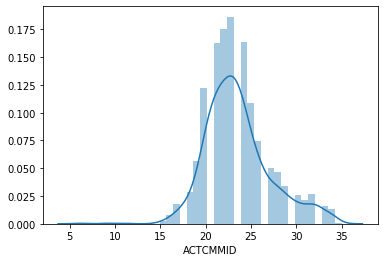

In [19]:
# ACT Score
sns.distplot(college_data['ACTCMMID'])

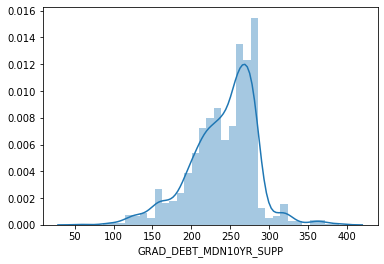

In [20]:
sns.distplot(college_data['GRAD_DEBT_MDN10YR_SUPP'])

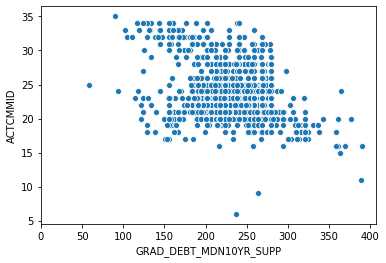

In [27]:
sns.scatterplot(x="GRAD_DEBT_MDN10YR_SUPP", y="ACTCMMID", data=college_data)
plt.xticks(np.arange(0, college_data['GRAD_DEBT_MDN10YR_SUPP'].max()+50, 50.0))
plt.show()

## Machine Learning Analysis

In [29]:
import numpy as np
from sklearn import metrics, svm
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import utils
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

features = ['ACTCMMID', 'TUITIONFEE_IN']

X = college_data[features]
print(X)
y = college_data['GRAD_DEBT_MDN10YR_SUPP']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

      ACTCMMID  TUITIONFEE_IN
0         18.0         9857.0
1         25.0         8328.0
3         28.0        10280.0
4         18.0        11068.0
5         28.0        10780.0
...        ...            ...
6437      24.0         6347.0
6442      25.0        32500.0
6475      23.0        17561.0
6584      17.0         9480.0
6643      22.0         7582.0

[1234 rows x 2 columns]
Accuracy of Logistic regression classifier on training set: 0.13
Accuracy of Logistic regression classifier on test set: 0.13
Accuracy of SVM classifier on training set: 0.16
Accuracy of SVM classifier on test set: 0.16


## Reflection

In [118]:
college_data['C100_4_POOLED'].unique()

array([0.0528, 0.31  , 0.1917, ..., 0.2995, 0.2973, 0.1239])

## Next Steps